# Laboratorio 2

## Inteligencia de Negocios

## Integrantes:
    Juan Diego Cardona 201819447
    Nicolas Ortega 201814515
    Camila Teran 201822000

## Carga de librerías necesarias para implementación

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots


## Carga de datos

In [42]:
# Se cargan los datos. 
datos=pd.read_csv('datos.csv', sep=';', encoding = 'utf-8')

## Perfilamiento y entendimiento de los datos 

In [43]:
datos.shape

(660, 11)

In [44]:
datos.head()

,Id,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073.0,20000.0,Female,2,Married,24.0,2.0,1,1.0,0
1,2,38414.0,120000.0,Female,2,Single,26.0,3.0,0,10.0,9
2,3,17341.0,90000.0,Female,2,Single,34.0,7.0,1,3.0,4
3,4,40496.0,50000.0,Female,2,Married,37.0,5.0,1,1.0,?
4,5,47437.0,50000.0,Male,2,Married,57.0,6.0,0,12.0,3


In [45]:
# Revisar las características de los datos: completitud y tipo de dato
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   660 non-null    int64  
 1   Customer             658 non-null    float64
 2   Limit_bal            659 non-null    float64
 3   Sex                  659 non-null    object 
 4   Education            659 non-null    object 
 5   Marriage             658 non-null    object 
 6   Age                  659 non-null    float64
 7   Total_Credit_Cards   658 non-null    float64
 8   Total_visits_bank    658 non-null    object 
 9   Total_visits_online  659 non-null    float64
 10  Total_calls_made     659 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 56.8+ KB


In [46]:
# Resumen de los estadisticos de las variables numéricas
datos.describe()

,Id,Customer,Limit_bal,Age,Total_Credit_Cards,Total_visits_online
count,660.000000,658.000000,659.000000,659.000000,6.580000e+02,659.000000
mean,330.500000,55180.056231,170000.000000,95.218513,1.876290e+05,2.602428
std,190.669872,25651.348197,129739.041329,1432.660847,4.812847e+06,2.936469
min,1.000000,11265.000000,10000.000000,21.000000,1.000000e+00,0.000000
25%,165.750000,33875.500000,50000.000000,28.000000,3.000000e+00,1.000000
50%,330.500000,53907.000000,140000.000000,33.000000,5.000000e+00,2.000000
75%,495.250000,77321.500000,240000.000000,41.000000,6.000000e+00,4.000000
max,660.000000,99843.000000,630000.000000,36745.000000,1.234568e+08,15.000000


In [47]:
datos.dtypes

Id                       int64
Customer               float64
Limit_bal              float64
Sex                     object
Education               object
Marriage                object
Age                    float64
Total_Credit_Cards     float64
Total_visits_bank       object
Total_visits_online    float64
Total_calls_made        object
dtype: object

# Limpieza de Datos

In [48]:
datoslimpios = datos
datoslimpios

,Id,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073.0,20000.0,Female,2,Married,24.0,2.0,1,1.0,0
1,2,38414.0,120000.0,Female,2,Single,26.0,3.0,0,10.0,9
2,3,17341.0,90000.0,Female,2,Single,34.0,7.0,1,3.0,4
3,4,40496.0,50000.0,Female,2,Married,37.0,5.0,1,1.0,?
4,5,47437.0,50000.0,Male,2,Married,57.0,6.0,0,12.0,3
...,...,...,...,...,...,...,...,...,...,...,...
655,656,51108.0,280000.0,Male,2,Married,39.0,10.0,1,10.0,0
656,657,60732.0,290000.0,Female,3,Single,27.0,10.0,1,13.0,2
657,658,53834.0,190000.0,Female,1,Single,28.0,8.0,1,9.0,1
658,659,80655.0,80000.0,Female,1,Single,23.0,10.0,1,15.0,0


In [49]:
for x in datoslimpios.columns:
    datoslimpios.drop(datoslimpios.loc[datoslimpios[x]=='?'].index,inplace=True)

In [50]:
datoslimpios["Sex"]=datoslimpios.Sex.replace({'F':'Female','f':'Female','Femael':'Female','Fmale':'Female'})
datoslimpios["Sex"]=datoslimpios.Sex.replace({'M':'Male','Mael':'Male','M ':'Male'})
datoslimpios.drop(datoslimpios.loc[datoslimpios["Sex"]=='9'].index,inplace=True)

In [51]:
datoslimpios["Education"]=datoslimpios.Education.replace({'6':'5'})
datoslimpios.drop(datoslimpios.loc[datoslimpios["Education"]=='ABC'].index,inplace=True)

In [52]:
datoslimpios.drop(datoslimpios.loc[datoslimpios["Marriage"]=='1'].index,inplace=True)
datoslimpios.drop(datoslimpios.loc[datoslimpios["Marriage"]=='2'].index,inplace=True)
datoslimpios.drop(datoslimpios.loc[datoslimpios["Marriage"]=='0'].index,inplace=True)

In [53]:
datoslimpios = datoslimpios.dropna()

In [54]:
datoslimpios

,Id,Customer,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073.0,20000.0,Female,2,Married,24.0,2.0,1,1.0,0
1,2,38414.0,120000.0,Female,2,Single,26.0,3.0,0,10.0,9
2,3,17341.0,90000.0,Female,2,Single,34.0,7.0,1,3.0,4
4,5,47437.0,50000.0,Male,2,Married,57.0,6.0,0,12.0,3
5,6,58634.0,50000.0,Male,1,Single,37.0,3.0,0,1.0,8
...,...,...,...,...,...,...,...,...,...,...,...
655,656,51108.0,280000.0,Male,2,Married,39.0,10.0,1,10.0,0
656,657,60732.0,290000.0,Female,3,Single,27.0,10.0,1,13.0,2
657,658,53834.0,190000.0,Female,1,Single,28.0,8.0,1,9.0,1
658,659,80655.0,80000.0,Female,1,Single,23.0,10.0,1,15.0,0


In [55]:
#Restricciones

datoslimpios = datoslimpios.drop(['Id'], axis=1)
datoslimpios = datoslimpios.drop(['Customer'], axis=1)

datoslimpios = datoslimpios[datoslimpios.Age < 100]
datoslimpios = datoslimpios[datoslimpios.Age >= 21]

datoslimpios = datoslimpios[datoslimpios.Total_Credit_Cards <= 10]


In [56]:
datoslimpios["Total_visits_bank"] = datoslimpios.Total_visits_bank.astype(float)
datoslimpios["Total_calls_made"] = datoslimpios.Total_calls_made.astype(float)
datoslimpios["Education"] = datoslimpios.Education.astype(float)

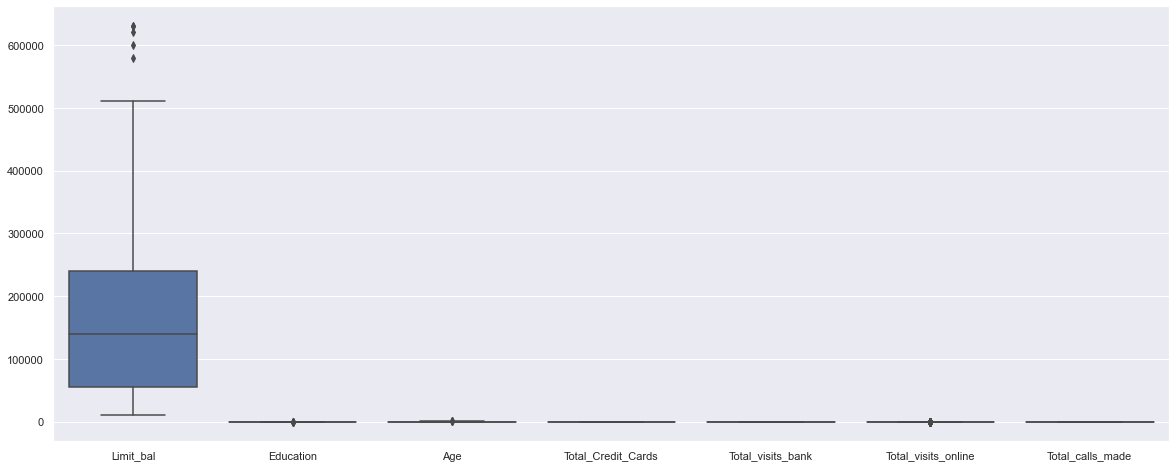

In [64]:
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(20,8))
ax = sns.boxplot(data=datoslimpios, orient="v")

In [58]:
# Explorar las variables que no son numéricas
name_cols_non_number = datoslimpios.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['Sex', 'Marriage'], dtype='object')

In [59]:
#Revisar el contenido de las variables que no son numéricas
datoslimpios[name_cols_non_number].describe()

,Sex,Marriage
count,639,639
unique,2,3
top,Female,Single
freq,369,373


In [60]:
#Consulto una muestra de datos para analizarlos mejor
datoslimpios[name_cols_non_number].sample(15)

,Sex,Marriage
329,Male,Married
168,Female,Married
376,Male,Married
238,Female,Married
385,Female,Married
164,Female,Married
29,Male,Single
601,Male,Married
641,Female,Married
426,Female,Single


In [70]:
datoslimpios

,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,20000.0,Female,2.0,Married,24.0,2.0,1.0,1.0,0.0
1,120000.0,Female,2.0,Single,26.0,3.0,0.0,10.0,9.0
2,90000.0,Female,2.0,Single,34.0,7.0,1.0,3.0,4.0
4,50000.0,Male,2.0,Married,57.0,6.0,0.0,12.0,3.0
5,50000.0,Male,1.0,Single,37.0,3.0,0.0,1.0,8.0
...,...,...,...,...,...,...,...,...,...
655,280000.0,Male,2.0,Married,39.0,10.0,1.0,10.0,0.0
656,290000.0,Female,3.0,Single,27.0,10.0,1.0,13.0,2.0
657,190000.0,Female,1.0,Single,28.0,8.0,1.0,9.0,1.0
658,80000.0,Female,1.0,Single,23.0,10.0,1.0,15.0,0.0


## Iteración 1. Primer modelo

### Identificación de variables a utilizar

In [73]:
name_cols_number = ['Limit_bal','Education','Age','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made']

### Prepararación de datos

In [84]:
# Ver si hay grupos naturales en los datos
sns.pairplot(datoslimpios.dropna(), height=,vars=['Limit_bal','Education','Age','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made'],kind='scatter')

SyntaxError: invalid syntax (<ipython-input-84-3df06bd9d672>, line 2)

### Construcción el modelo

In [85]:
X=datoslimpios[name_cols_number]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [86]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [78]:
#Transformar arreglo el dataframe que trabajamos para aplicar funciones más adelante.
cols_number = datoslimpios.to_numpy()
cols_number

array([[20000.0, 'Female', 2.0, ..., 1.0, 1.0, 0.0],
       [120000.0, 'Female', 2.0, ..., 0.0, 10.0, 9.0],
       [90000.0, 'Female', 2.0, ..., 1.0, 3.0, 4.0],
       ...,
       [190000.0, 'Female', 1.0, ..., 1.0, 9.0, 1.0],
       [80000.0, 'Female', 1.0, ..., 1.0, 15.0, 0.0],
       [280000.0, 'Female', 2.0, ..., 0.0, 12.0, 2.0]], dtype=object)

In [92]:
#Consultar el los labels del clúster asignado a cada fila 
kmeans.labels_

array([3, 3, 3, 3, 3, 0, 3, 1, 3, 1, 0, 3, 1, 2, 1, 1, 3, 3, 0, 3, 3, 3,
       3, 3, 3, 1, 3, 0, 1, 2, 3, 2, 2, 3, 1, 3, 1, 3, 3, 2, 1, 1, 0, 1,
       3, 3, 1, 1, 3, 1, 1, 3, 2, 1, 2, 3, 3, 2, 3, 1, 0, 2, 3, 2, 3, 1,
       2, 1, 1, 3, 1, 2, 3, 1, 3, 3, 2, 1, 3, 3, 1, 2, 0, 3, 3, 3, 3, 2,
       1, 2, 2, 3, 2, 3, 3, 3, 1, 3, 2, 1, 3, 0, 3, 2, 3, 3, 1, 1, 3, 3,
       3, 1, 0, 2, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 3, 3, 1, 1, 3, 2, 1, 3,
       2, 2, 3, 1, 1, 1, 1, 3, 3, 3, 2, 1, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3,
       2, 1, 3, 3, 3, 3, 1, 3, 0, 3, 3, 3, 2, 1, 1, 3, 2, 3, 1, 1, 3, 3,
       1, 3, 0, 3, 1, 1, 1, 3, 2, 3, 3, 1, 3, 2, 1, 1, 3, 3, 0, 3, 1, 3,
       2, 2, 2, 2, 2, 3, 1, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 3,
       3, 3, 1, 3, 3, 1, 3, 2, 3, 3, 3, 1, 1, 2, 3, 1, 1, 3, 1, 0, 3, 1,
       1, 3, 1, 3, 1, 3, 3, 3, 3, 2, 1, 2, 3, 0, 3, 3, 1, 3, 2, 1, 3, 1,
       1, 1, 0, 3, 1, 2, 3, 3, 3, 1, 1, 3, 1, 2, 2, 3, 0, 3, 3, 1, 3, 0,
       2, 3, 3, 2, 1, 3, 1, 3, 3, 3, 2, 3, 1, 3, 2,

### Visualización de resultados

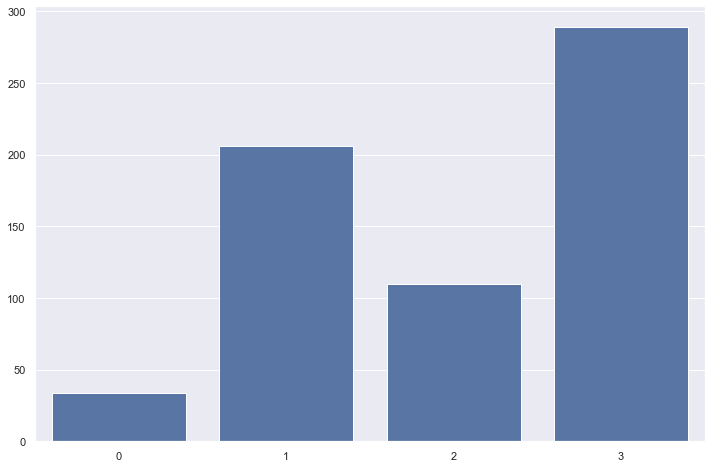

In [87]:
# Revisar la cantidad de registros en los clústeres resultado
labels = kmeans.labels_
datoslimpios['Cluster'] = labels

cluster_distrib = datoslimpios['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');


In [90]:
# Revisar el número exacto de elementos por clúster y las variables utilizadas.
datoslimpios.groupby('Cluster').count()

,Limit_bal,Sex,Education,Marriage,Age,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Cluster,,,,,,,,,
0,34,34,34,34,34,34,34,34,34
1,206,206,206,206,206,206,206,206,206
2,110,110,110,110,110,110,110,110,110
3,289,289,289,289,289,289,289,289,289


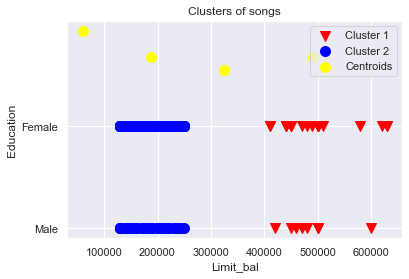

In [89]:
# Ver gráficamente los elementos de los diferentes clúster
plt.scatter(cols_number[kmeans.labels_ == 0, 0], cols_number[kmeans.labels_ == 0, 1], s = 100, marker='v', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number[kmeans.labels_ == 1, 0], cols_number[kmeans.labels_ == 1, 1], s = 100, marker='o', c = 'blue', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of songs')
plt.xlabel(name_cols_number[0])
plt.ylabel(name_cols_number[1])
plt.legend()
plt.show()


In [91]:
# Revisemos los valores de los centroides de los clústeres generados
print('Centroides: [[',name_cols_number[0], ' ' , name_cols_number[1], ']]', kmeans.cluster_centers_)

Centroides: [[ Limit_bal   Education ]] [[4.91764706e+05 1.67647059e+00 3.87058824e+01 4.32352941e+00
  2.64705882e+00 2.64705882e+00 3.50000000e+00]
 [1.87766990e+05 1.67961165e+00 3.54902913e+01 4.90776699e+00
  2.47572816e+00 2.61165049e+00 3.35922330e+00]
 [3.23909091e+05 1.55454545e+00 3.77545455e+01 4.80909091e+00
  2.59090909e+00 2.60909091e+00 3.59090909e+00]
 [5.97231834e+04 1.93425606e+00 3.33217993e+01 4.72318339e+00
  2.36332180e+00 2.55709343e+00 3.50519031e+00]]


## Iteración 2. Segundo modelo con mejoras a nivel de preparación de datos y configuración de hiper-parámetros 

### Preparación de datos

In [278]:
#TODO: Aplicar métodos para normalizar y estandarizar los datos, uno a la vez y concluir

mms = 


df_tracks_prep_norm = mms.fit_transform(df_tracks_prep.copy())
saved_cols = df_tracks_prep.columns

df_tracks_prep_norm = pd.DataFrame(df_tracks_prep_norm, columns =saved_cols)


SyntaxError: invalid syntax (<ipython-input-278-c6a6ce87bcd0>, line 3)

In [279]:
# Mirar  los estadísticos y revisar el resultado de la normalización
df_tracks_prep_norm.describe()

NameError: name 'df_tracks_prep_norm' is not defined

### Encontrar el número óptimo de clústeres utilizando el método del codo

In [280]:
def plot_distortion(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Distortion',
                    xlabel = 'Number of clusters',
                    title = 'Distortion Plot'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    distortions = []
    for i in range(k_min, k_max):
        km = KMeans(n_clusters=i,
                 init='k-means++',
                 n_init=10,
                 max_iter=300,
                 random_state=0)
        km.fit(data)
        distortions.append(km.inertia_)
    plt.plot(range(k_min,k_max), distortions, marker='o')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [281]:
plot_distortion(df_tracks_prep_norm,1,11)

NameError: name 'df_tracks_prep_norm' is not defined

### Construcción el nuevo modelo con el número de clústeres obtenido

In [282]:
#TODO: Completar de acuerdo con la gráfica el número de clusters
N_clusters=
kmeans2 = KMeans(n_clusters=N_clusters, random_state=0) 
kmeans2 = kmeans2.fit(df_tracks_prep_norm)


SyntaxError: invalid syntax (<ipython-input-282-8c3dd7ad559a>, line 2)

### Vizualización de resultados

In [283]:
# Revisar la cantidad de registros en los clústeres resultado
labels = kmeans.labels_
df_tracks_prep_norm['Cluster'] = labels

cluster_distrib = df_tracks_prep_norm['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');


AttributeError: 'KMeans' object has no attribute 'labels_'

In [284]:
# Revisar el número exacto de elementos por clúster y las variables utilizadas.
df_tracks_prep_norm.groupby('Cluster').count()

NameError: name 'df_tracks_prep_norm' is not defined

In [285]:
# Consultamos algunos de los registros en el clúster 0.
cols_number[kmeans2.labels_ == 0, len(name_cols_number)-1]

NameError: name 'cols_number' is not defined

In [286]:
# El análisis lo haremos por pareja de atributos, en este caso duration_ms y loudness
plt.scatter(cols_number[kmeans2.labels_ == 0, 0], cols_number[kmeans2.labels_ == 0, 1], s = 100, marker='v', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number[kmeans2.labels_ == 1, 0], cols_number[kmeans2.labels_ == 1, 1], s = 100, marker='o', c = 'blue', label = 'Cluster 2')

plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'Centroids')
plt.title('Clusters of songs')
plt.xlabel(name_cols_number[0])
plt.ylabel(name_cols_number[1])
plt.legend()
plt.show()


NameError: name 'cols_number' is not defined

In [287]:
# Revisemos los valores de los centroides de los clústeres generados
print('Centroides: [[',name_cols_number[0], ' ' , name_cols_number[1], ']]', kmeans2.cluster_centers_)

NameError: name 'kmeans2' is not defined

### Evaluación de la calidad de los clústeres obtenidos

In [288]:
#Creamos una función basada en el concepto de silueta
def plot_silhouette(data, 
                    labels,
                   ylabel = 'Clústeres',
                   xlabel = "Silhouette coefficient",
                   title = 'Silhouette Plot'):
    '''
    Graficar la silueta de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    labels : np.array
        El arreglo con las etiquetas correspondientes
    ylabel  string
        La etiqueta del eje y
    xlabel : string
        La etiqueta del eje x
    title : string
        El titulo de la gráfica        
    '''
    cluster_labels = np.unique(labels)
    print(cluster_labels)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data,
                                        labels,
                                        metric='euclidean')
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),
                        c_silhouette_vals,
                        height=1.0,
                        edgecolor='none',
                        color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,
                color="red",
                linestyle="--")
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

In [289]:
# Esta función puede tardar varios minutos
plot_silhouette(data = df_tracks_prep_norm, 
                labels = kmeans2.labels_, 
                ylabel = 'Clustering with four clusters')

NameError: name 'df_tracks_prep_norm' is not defined

## Iteración 3. Nuevo modelo con mejoras a nivel de preparación de datos 


### Identificación de las variables a utilizar 

In [38]:
df_tracks.dtypes

id                   object
name                 object
popularity          float64
duration_ms           int64
explicit            float64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
loudness            float64
mode                 object
decibel_range       float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature      float64
first_artist         object
second_artist        object
dtype: object

In [39]:
# ¿Qué pasará si se incluyen todas las variables numéricas?  ¿Será fácil la interpretación?
#name_cols_number = df_tracks.select_dtypes(include = ['float', 'int64']).columns
#df_tracks_prep2['release_date'] = df_tracks['release_date']

name_cols_number = ['duration_ms','loudness', 'release_date']
df_tracks_prep3 = df_tracks[name_cols_number].copy()


name_cols_iter3 = df_tracks_prep3.columns
name_cols_iter3


Index(['duration_ms', 'loudness', 'release_date'], dtype='object')

### Determinación de el "mejor" número de clúster 

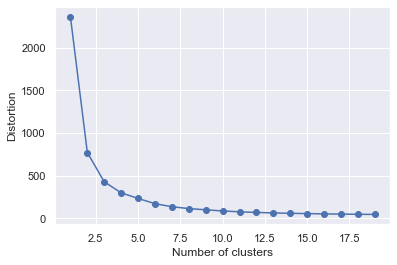

In [54]:
plot_distortion(df_tracks_prep_norm3,1,20)

In [55]:
# Identificar el valor de K, utilizando ahora el valor de la silueta

def plot_selectK_silhoute(data,
                    k_min=1, 
                    k_max=11,
                    ylabel = 'Silhouette Coefficient',
                    xlabel = 'Number of clusters',
                    style = 'fivethirtyeight'):
    '''
    Graficar el codo de los clusters
    
    Parametros
    ----------
    data : np.array
        El arreglo con los datos
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    xlabel : string
        La etiqueta del eje x
    ylabel  string
        La etiqueta del eje y    
    title : string
        El titulo de la gráfica  
    '''
    # Crear una lista para almacenar los coeficientes de la silueta para cada valor de k analizado

    silhouette_coefficients = []

    # Notice you start at 2 clusters for silhouette coefficient
    for k in range(k_min, k_max):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_coefficients.append(score)
    plt.style.use(style)
    plt.plot(range(k_min, k_max), silhouette_coefficients)
    plt.xticks(range(k_min, k_max))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()    

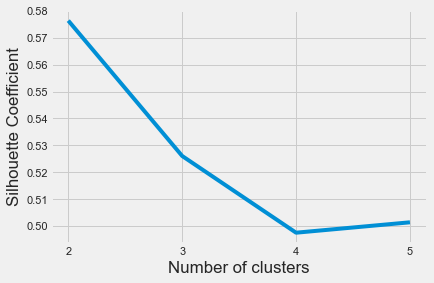

In [56]:
# Esta función puede tomar bastantes minutos!!!
plot_selectK_silhoute(df_tracks_prep_norm3,
                    k_min=2, 
                    k_max=6)

### Construcción de el modelo

In [57]:
# Construimos un nuevo modelo, con las nuevas columnas y probaremos con k=2 y k=3
N_clusters=
kmeans3 = KMeans(n_clusters=N_clusters, random_state=0) 
kmeans3 = kmeans3.fit(df_tracks_prep_norm3[name_cols_number])

In [58]:
#Transformar el contenido de las columnas a arreglo
cols_number = df_tracks_prep_norm3.to_numpy()
cols_number

array([[0.05049581, 0.13955908, 0.98018868],
       [0.03153186, 0.16583209, 0.98962264],
       [0.03242801, 0.30578136, 0.99811321],
       ...,
       [0.03870385, 0.01359173, 0.95896226],
       [0.03601454, 0.28158939, 0.9990566 ],
       [0.02443068, 0.50146322, 0.97264151]])

### Visualización de el resultado

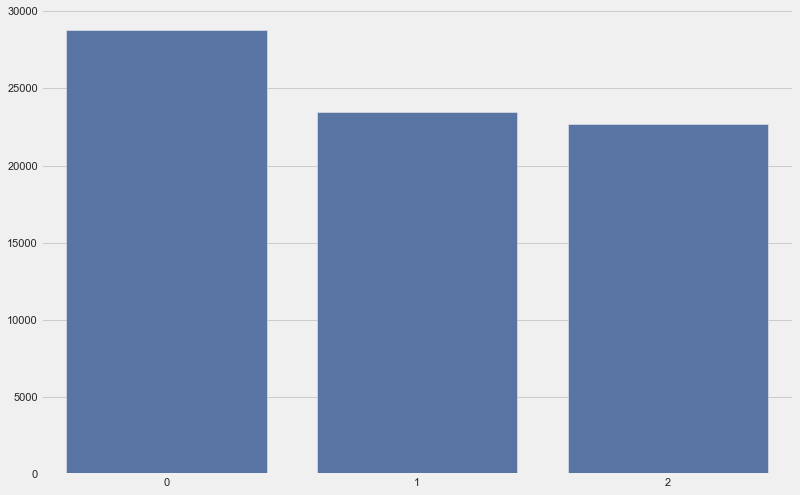

In [59]:
# Revisar la cantidad de registros en los clústeres resultado
labels = kmeans3.labels_
df_tracks_prep_norm3['Cluster'] = labels

cluster_distrib = df_tracks_prep_norm3['Cluster'].value_counts()

fig=plt.figure(figsize=(12,8))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values, color='b');


In [60]:
# Revisar el número exacto de elementos por clúster y las variables utilizadas.
df_tracks_prep_norm3.groupby('Cluster').count()

,duration_ms,loudness,release_year
Cluster,,,
0,28784,28784,28784
1,23470,23470,23470
2,22667,22667,22667


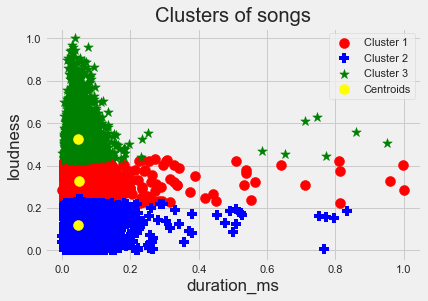

In [61]:
# Dibujar las primeras dos columnas utilizadas en el clustering que están en la posición 0 y 1
plt.scatter(cols_number[kmeans3.labels_ == 0, 0], cols_number[kmeans3.labels_ == 0, 1], s = 100, marker='o', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number[kmeans3.labels_ == 1, 0], cols_number[kmeans3.labels_ == 1, 1], s = 100, marker='+', c = 'blue', label = 'Cluster 2')
plt.scatter(cols_number[kmeans3.labels_ == 2, 0], cols_number[kmeans3.labels_ == 2, 1], s = 100, marker='*', c = 'green', label = 'Cluster 3')
#plt.scatter(cols_number[kmeans3.labels_ == 3, 0], cols_number[kmeans3.labels_ == 3, 1], s = 100, marker='v', c = 'purple', label = 'Cluster 4')

plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of songs')
plt.xlabel(name_cols_number[0])
plt.ylabel(name_cols_number[1])
plt.legend()
plt.show()


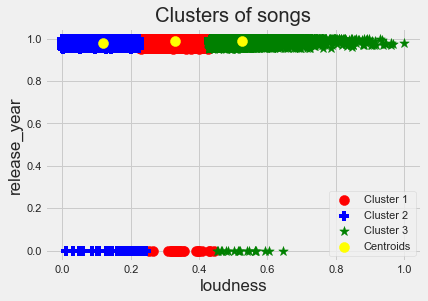

In [67]:
# Dibujar las primeras dos columnas utilizadas en el clustering que están en la posición 1 y 2
plt.scatter(cols_number[kmeans3.labels_ == 0, 1], cols_number[kmeans3.labels_ == 0, 2], s = 100, marker='o', c = 'red', label = 'Cluster 1')
plt.scatter(cols_number[kmeans3.labels_ == 1, 1], cols_number[kmeans3.labels_ == 1, 2], s = 100, marker='+', c = 'blue', label = 'Cluster 2')
plt.scatter(cols_number[kmeans3.labels_ == 2, 1], cols_number[kmeans3.labels_ == 2, 2], s = 100, marker='*', c = 'green', label = 'Cluster 3')
#plt.scatter(cols_number[kmeans3.labels_ == 3, 0], cols_number[kmeans3.labels_ == 3, 1], s = 100, marker='v', c = 'purple', label = 'Cluster 4')

plt.scatter(kmeans3.cluster_centers_[:, 1], kmeans3.cluster_centers_[:, 2], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of songs')
plt.xlabel(name_cols_number[1])
plt.ylabel(name_cols_number[2])
plt.legend()
plt.show()


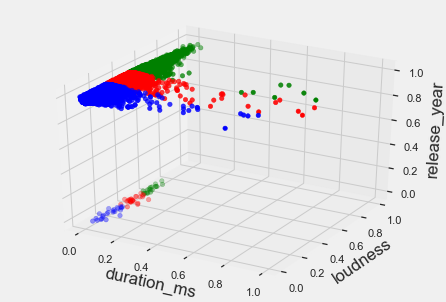

In [62]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(cols_number[kmeans3.labels_ == 0, 0], cols_number[kmeans3.labels_ == 0, 1], cols_number[kmeans3.labels_ == 0, 2],color='red')
ax.scatter(cols_number[kmeans3.labels_ == 2, 0], cols_number[kmeans3.labels_ == 2, 1], cols_number[kmeans3.labels_ == 2, 2],color='green')
ax.scatter(cols_number[kmeans3.labels_ == 1, 0], cols_number[kmeans3.labels_ == 1, 1], cols_number[kmeans3.labels_ == 1, 2],color='blue')

ax.scatter(kmeans3.cluster_centers_[:, 0],kmeans3.cluster_centers_[:, 1], kmeans3.cluster_centers_[:, 2], color='black',marker='o',s=200, label='centroids')
ax.set_xlabel(name_cols_number[0])
ax.set_ylabel(name_cols_number[1])
ax.set_zlabel(name_cols_number[2])
plt.show()

In [64]:
# Revisar con cuidado esta parte para entender su aporte en la interpretación de los clústeres
from kmeans_interp.kmeans_feature_imp import KMeansInterp

n_clusters = len(df_tracks_prep_norm3['Cluster'].unique())

kms = KMeansInterp(n_clusters=n_clusters,
                   random_state=1, 
                   ordered_feature_names=name_cols_number,
                   feature_importance_method='wcss_min').fit(cols_number)

kms.feature_importances_


{0: [('release_year', 0.9865286849420015),
  ('loudness', 0.3304168398686171),
  ('duration_ms', 0.047848432406737286)],
 1: [('release_year', 0.9906109843368541),
  ('loudness', 0.5277284741496172),
  ('duration_ms', 0.04674846015160574)],
 2: [('release_year', 0.9813720590773124),
  ('loudness', 0.11848252482370367),
  ('duration_ms', 0.04719034909994768)]}

<Figure size 1440x576 with 0 Axes>

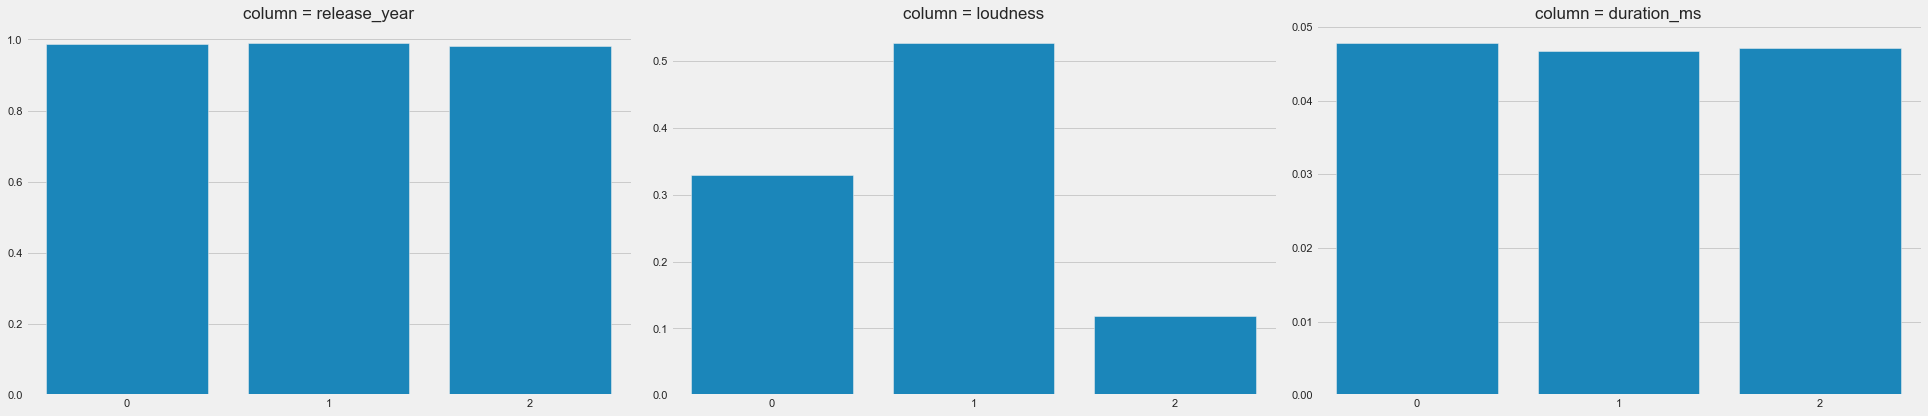

In [65]:
#Plots
arr = []
for c in kms.feature_importances_:
    for col, val in kms.feature_importances_[c]:
        arr.append({'column':col, 'importance':val, 'cluster': c})

df_plot = pd.DataFrame(arr)
fig=plt.figure(figsize=(20,8))
g = sns.FacetGrid(df_plot, col="column", sharey = False, height = 6, aspect = 1.5)
g.map_dataframe(sns.barplot, x="cluster", y = 'importance')

### Evaluación de la calidad de los clústeres obtenidos

[0 1 2]


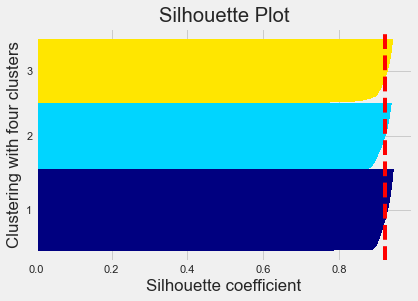

In [63]:
plot_silhouette(data = df_tracks_prep_norm3, 
                labels = kmeans3.labels_, 
                ylabel = 'Clustering with four clusters')